## King County Housing Sales

- Student name: Olaide Kashimawo
- Student pace: Self Paced
- Scheduled project review date/time: 
- Instructor name:Morgan Jones
- Blog post URL: TBD

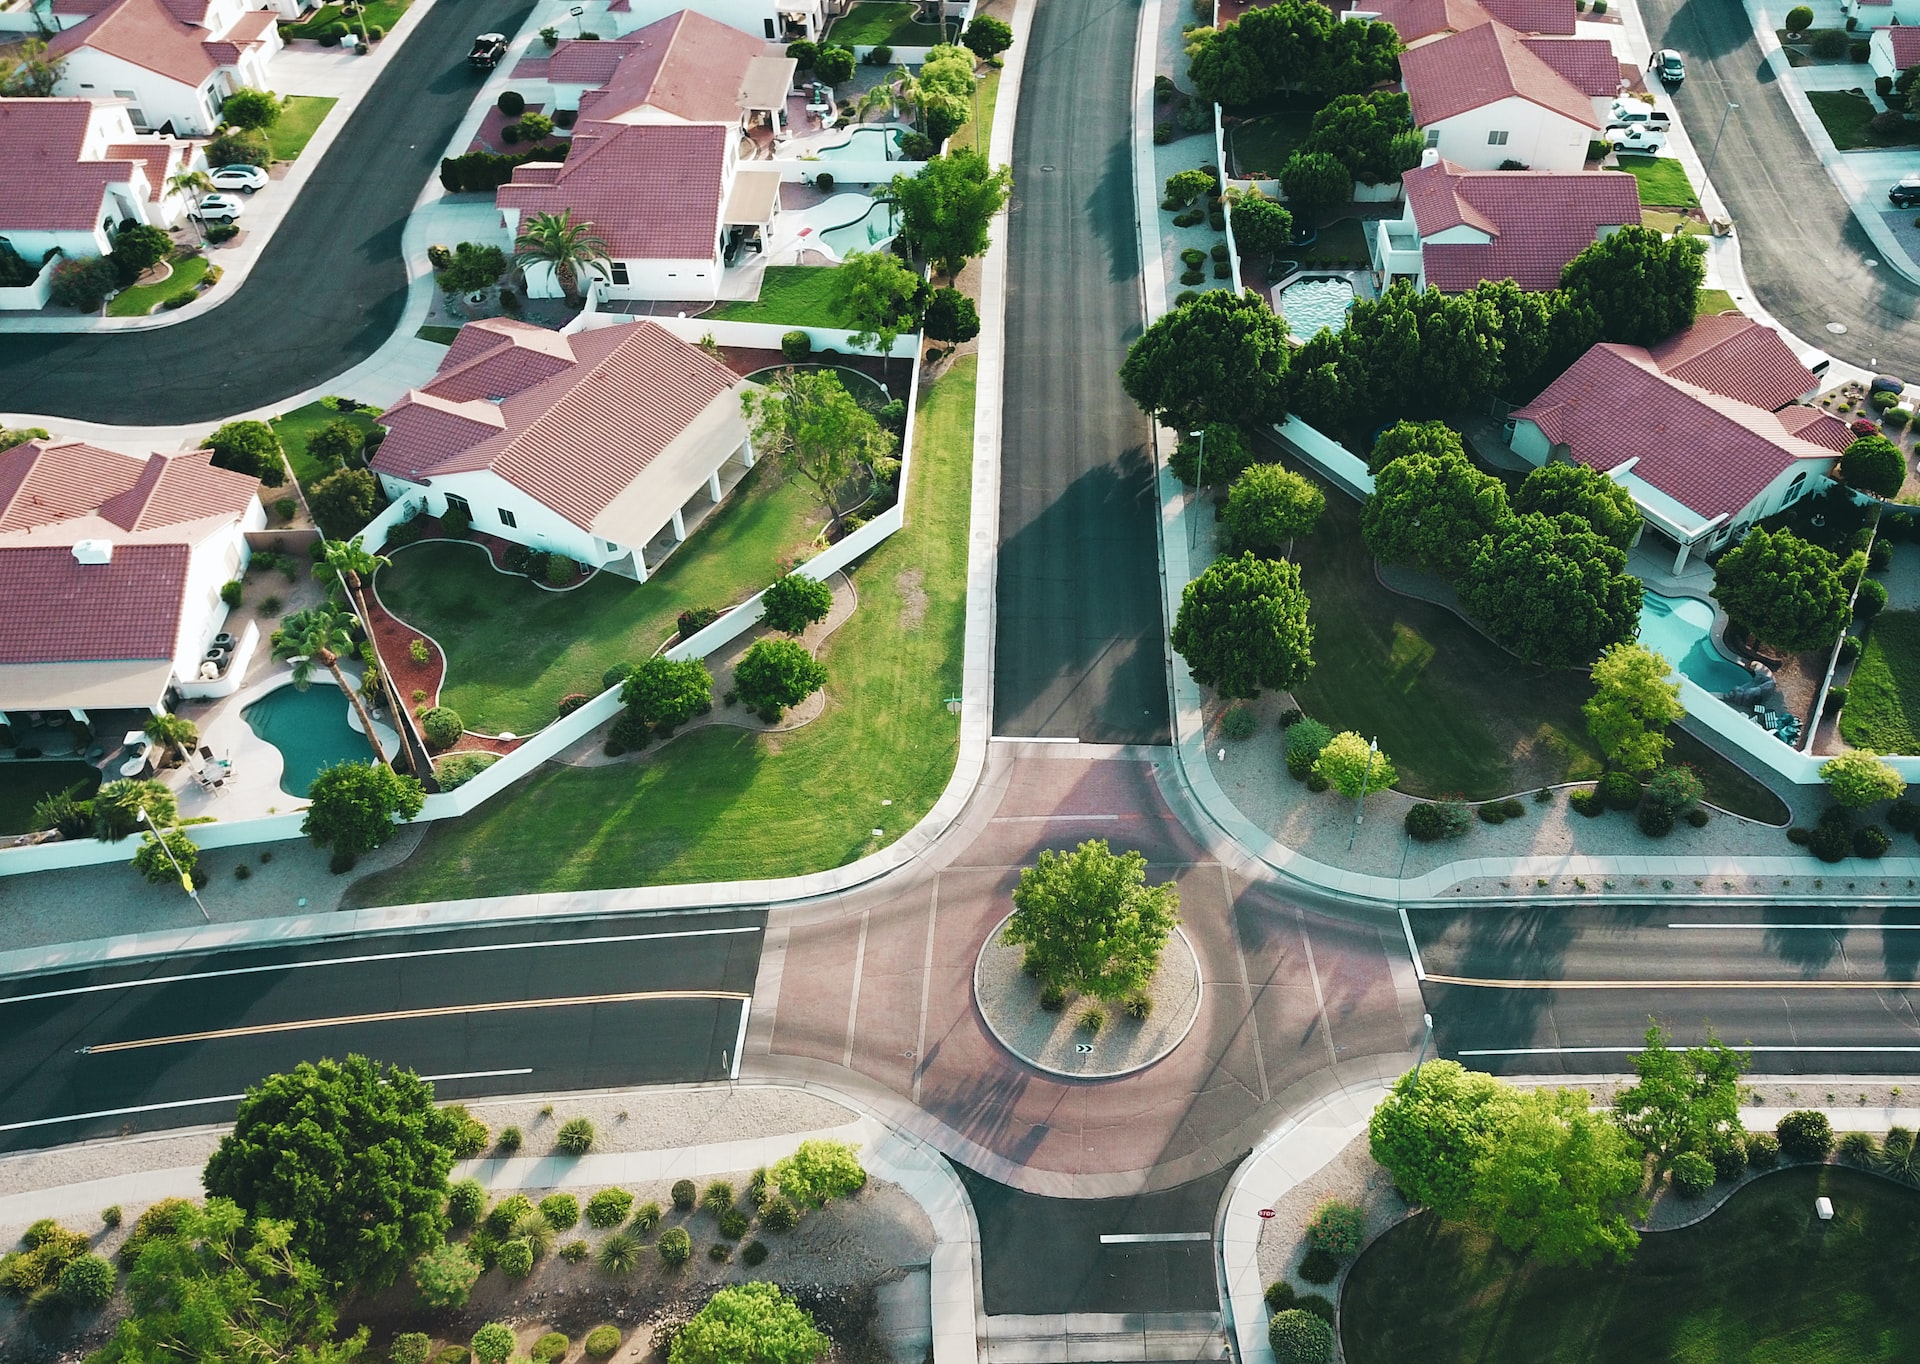

### OVERVIEW

****This dataset comprises the prices of homes that were sold in King County, which is where Seattle is located. It encompasses houses that were purchased between May 2014 and May 2015.****

id: a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors: Total floors (levels) in house

waterfront: House which has a view to a waterfront

view: Houses that has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015 (means-- some renovations) 

sqft_lot15 :Lotsize area in 2015 (means -- some renovations)

### BUSINESS UNDERSTANDING


### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import folium

plt.style.use('seaborn')
sns.set_theme()
%matplotlib inline


In [2]:
pd.set_option('display.max_column',21)

### DATA LOAD

In [3]:
#Load data into notebook
H_Sales = pd.read_csv("data/kc_house_data.csv")
H_Sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#checking the shape
H_Sales.shape

(21613, 21)

In [5]:
#checking the info to Display the data types of each Column (21 columns)
H_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
#To suppress the scientific notation in price
pd.set_option('display.float_format', lambda x: '%.5f'%x)

In [7]:
H_Sales.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00000,4580301520.86499,2876565571.31206,1000102.00000,2123049194.00000,3904930410.00000,7308900445.00000,9900000190.00000
price,21613.00000,540088.14177,367127.19648,75000.00000,321950.00000,450000.00000,645000.00000,7700000.00000
bedrooms,21613.00000,3.37084,0.93006,0.00000,3.00000,3.00000,4.00000,33.00000
bathrooms,21613.00000,2.11476,0.77016,0.00000,1.75000,2.25000,2.50000,8.00000
sqft_living,21613.00000,2079.89974,918.44090,290.00000,1427.00000,1910.00000,2550.00000,13540.00000
sqft_lot,21613.00000,15106.96757,41420.51152,520.00000,5040.00000,7618.00000,10688.00000,1651359.00000
floors,21613.00000,1.49431,0.53999,1.00000,1.00000,1.50000,2.00000,3.50000
waterfront,21613.00000,0.00754,0.08652,0.00000,0.00000,0.00000,0.00000,1.00000
view,21613.00000,0.23430,0.76632,0.00000,0.00000,0.00000,0.00000,4.00000
condition,21613.00000,3.40943,0.65074,1.00000,3.00000,3.00000,4.00000,5.00000


In [8]:
H_Sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### DATA CLEANING
There are 19 house features plus the price and the id columns, along with 21613 observations.

In [9]:
#checking and removing null data
H_Sales.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**There are no null data, let check for missing values**

In [10]:
#checking for duplicate values
H_Sales.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [11]:
#removing duplicates by checking the IDs
H_Sales.drop_duplicates(subset='id', keep='first', inplace=False, ignore_index=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00000,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,20150223T000000,400000.00000,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,20140623T000000,402101.00000,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,20150116T000000,400000.00000,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287


In [12]:
#Drop the columns "id" from axis 1

H_Sales = H_Sales.drop(['id', 'zipcode','lat','long'], axis=1)

In [13]:
H_Sales.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,1986.55249,12768.45565
std,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,685.39130,27304.17963
min,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,399.00000,651.00000
25%,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,1490.00000,5100.00000
50%,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,1840.00000,7620.00000
75%,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,2360.00000,10083.00000
max,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,6210.00000,871200.00000


### EXPLORATORY DATA ANALYSIS

Examining the data's correlation matrix. I'll explain the intended relationship between the variables using the heatmap. 

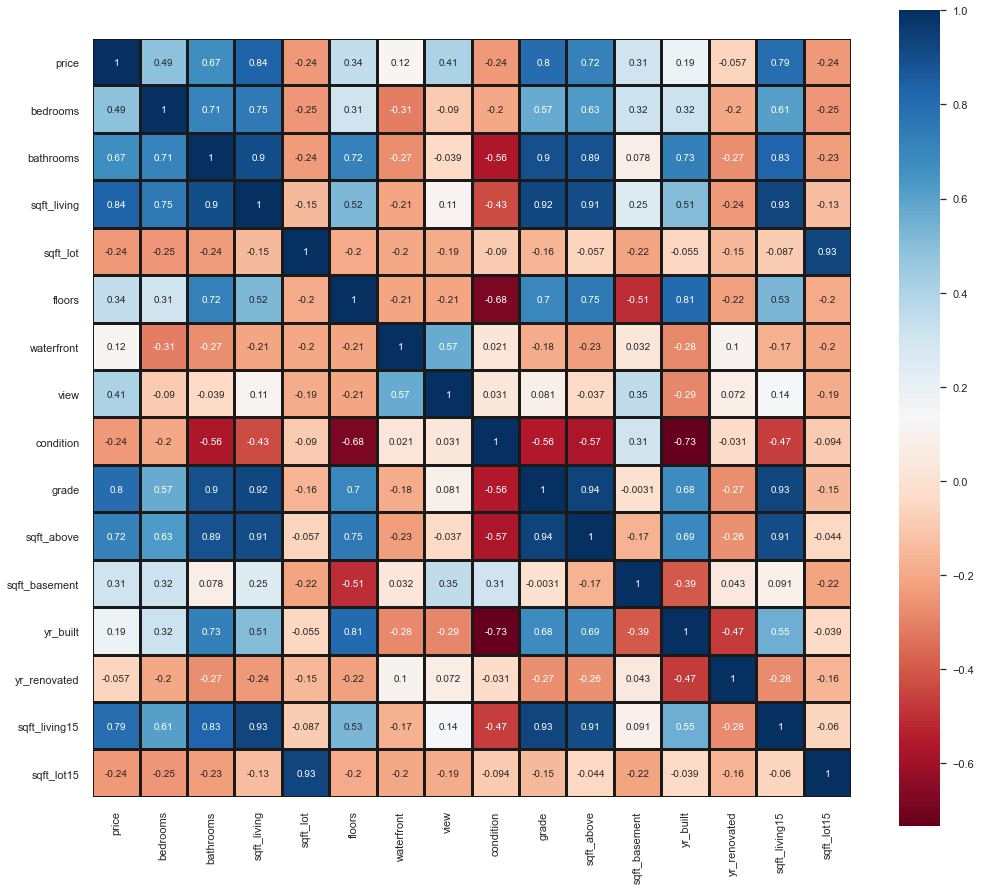

In [24]:
#Creating a correlation plot 
house_corr = H_Sales.corr()
plt.subplots(figsize=(17,15))
sns.heatmap(house_corr.astype(float).corr(),linewidths=2.0,vmax=1.0, square=True, cmap="RdBu", linecolor='k', annot=True)
plt.show()

In [25]:
# Checking the correlation of Price with other features
price_corr = house_corr.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.00000
sqft_living      0.83609
grade            0.80001
sqft_living15    0.79260
sqft_above       0.71805
bathrooms        0.67430
bedrooms         0.49075
view             0.40916
floors           0.34448
sqft_basement    0.31315
yr_built         0.18637
waterfront       0.11640
yr_renovated    -0.05725
condition       -0.23920
sqft_lot15      -0.24254
sqft_lot        -0.24278
Name: price, dtype: float64


The dark blue color has correlation of 1 which is the price.
There is a strong relationship between the price (target variable) and the number of bedrooms, bathrooms,sqft_living, floors, waterfront, view, grade, sqft_above, sqft_above and sqft_living15.

Scatter plot of price with the features like sqft_living, sqft_above, sqft_living15, sqft_basement, sqft_lot at  different condition as hue.

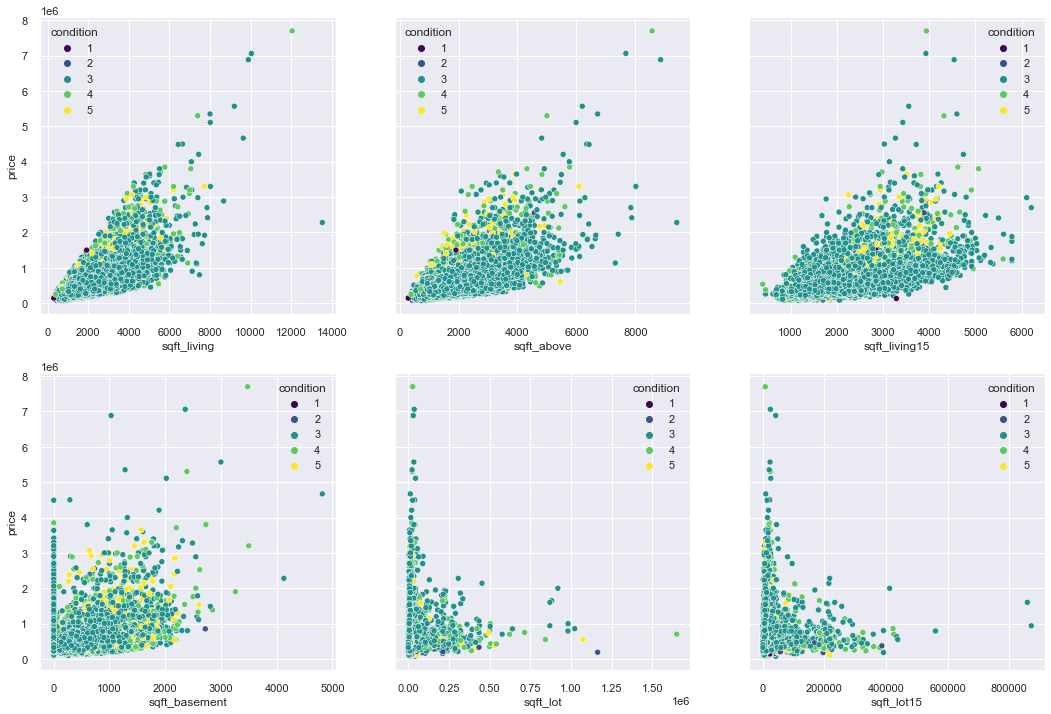

In [26]:
fig, axs = plt.subplots( nrows=2, ncols=3, sharey=True, figsize=(18,12))

sns.scatterplot(y='price',x='sqft_living',data=H_Sales,hue='condition', palette='viridis', ax=axs[0,0])
sns.scatterplot(y='price',x='sqft_above',data=H_Sales, hue='condition', palette='viridis', ax=axs[0,1])
sns.scatterplot(y='price',x='sqft_living15',data=H_Sales,hue='condition',  palette='viridis', ax=axs[0,2])
sns.scatterplot(y='price',x='sqft_basement',data=H_Sales, hue='condition', palette='viridis', ax=axs[1,0])
sns.scatterplot(y='price',x='sqft_lot',data=H_Sales, hue='condition', palette='viridis', ax=axs[1,1])
sns.scatterplot(y='price',x='sqft_lot15',data=H_Sales, hue='condition', palette='viridis', ax=axs[1,2])
plt.show()

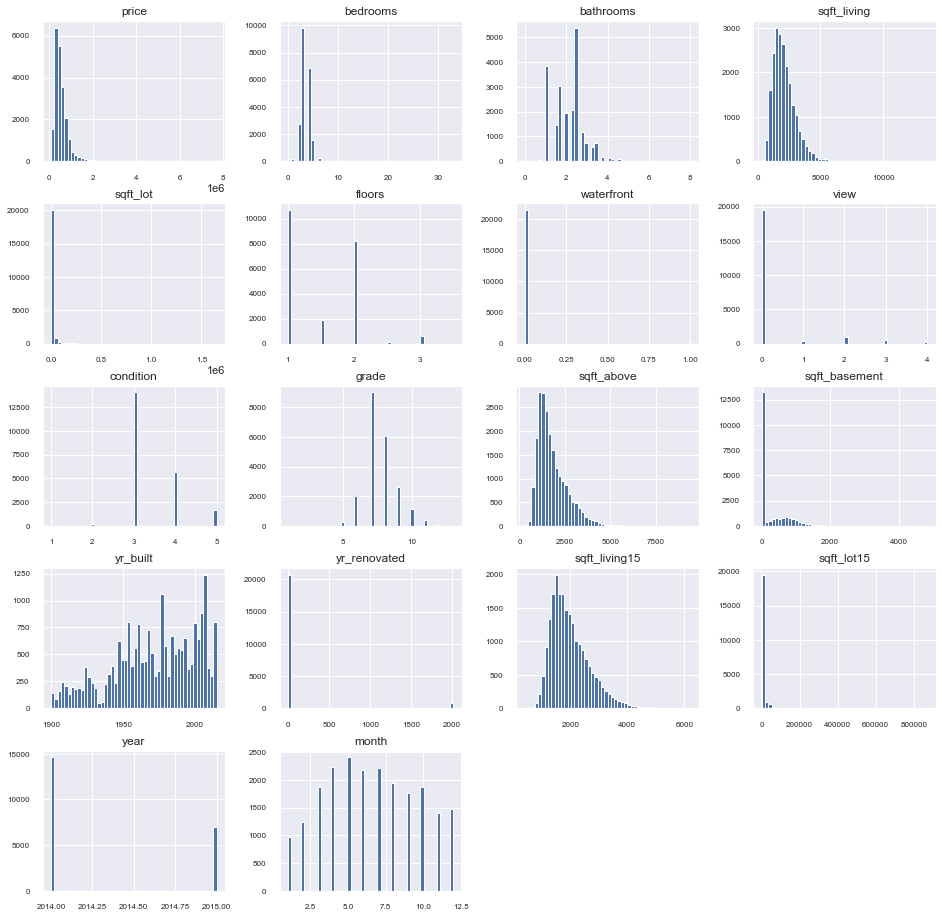

In [51]:
#checking the data for outliers
H_outliers = H_Sales.select_dtypes(include = ['float64', 'int64'])
H_outliers.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);

***There aren't any outliners in the price,however we don't to have remove it***

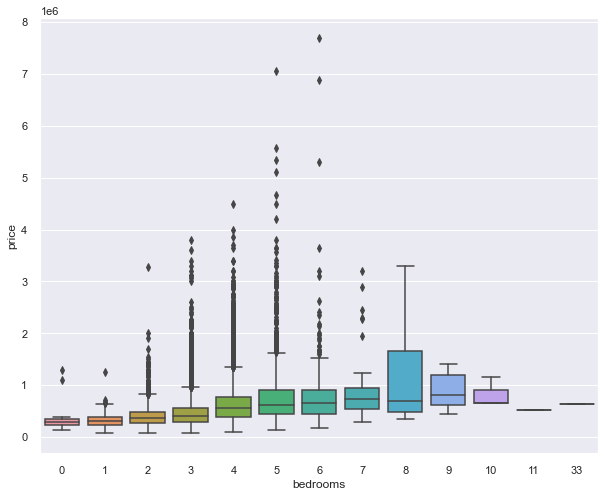

In [48]:
# checking price and bedrooms relationship
plt.figure(figsize= (10,8))
sns.boxplot(x='bedrooms', y='price', data=H_Sales);

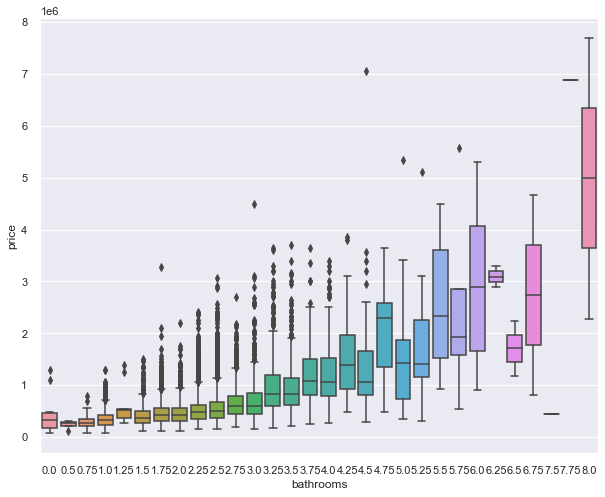

In [47]:
# checking price and bedrooms relationship
plt.figure(figsize= (10,8))
sns.boxplot(x='bathrooms', y='price', data=H_Sales);

In [30]:
H_Sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,1800,7503


In [32]:
H_Sales['date'] = pd.to_datetime(H_Sales['date'])
H_Sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,1340,5650
1,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,1690,7639
2,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,2720,8062
3,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,1360,5000
4,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,1800,7503


In [34]:
H_Sales['year'] = H_Sales['date'].apply(lambda date : date.year)
H_Sales['month'] = H_Sales['date'].apply(lambda date : date.month)
H_Sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,1340,5650,2014,10
1,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,1690,7639,2014,12
2,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,2720,8062,2015,2
3,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,1360,5000,2014,12
4,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

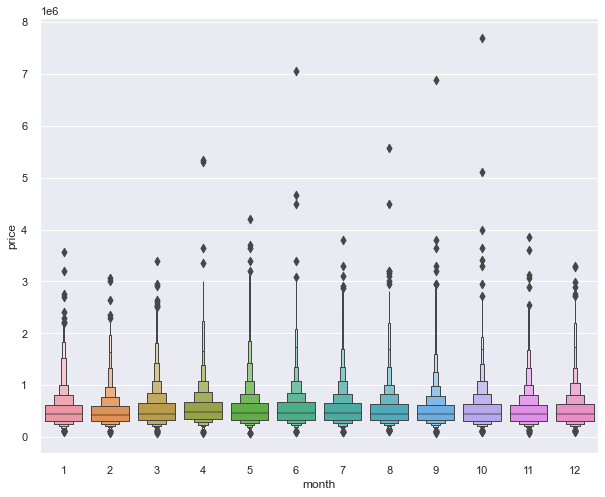

In [46]:
plt.figure(figsize=(10,8))
sns.boxenplot(x = 'month',y = 'price',data = H_Sales)

In [38]:
H_Sales.groupby('month').mean()['price']

month
1    525870.88957
2    507851.37120
3    543977.18720
4    561837.77499
5    550768.78583
6    558002.19954
7    544788.76436
8    536445.27680
9    529253.82187
10   539026.97178
11   521961.00921
12   524461.86676
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

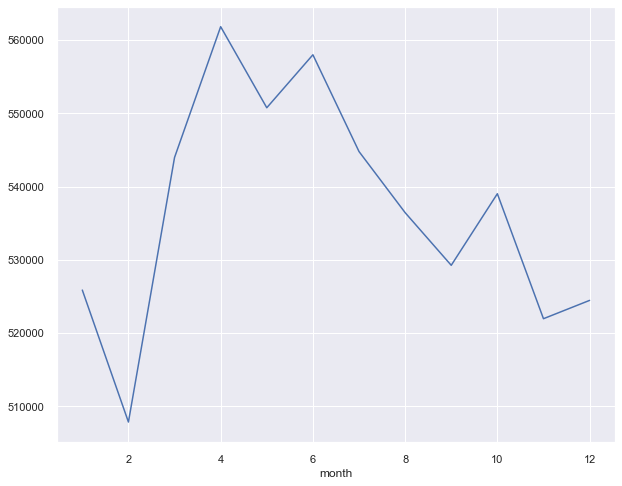

In [44]:
plt.figure(figsize= (10,8))
H_Sales.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

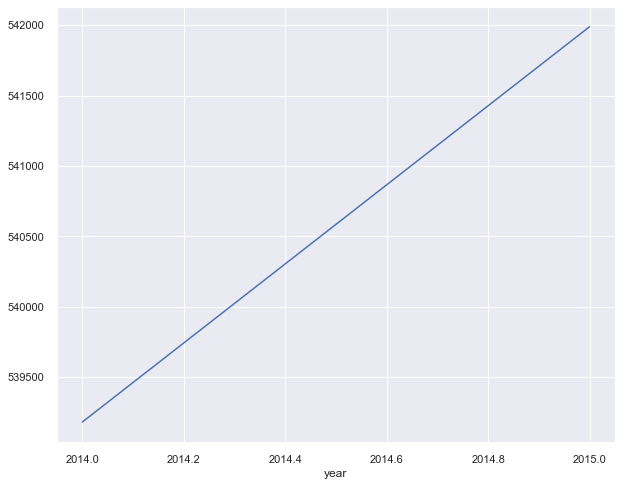

In [45]:
plt.figure(figsize= (10,8))
H_Sales.groupby('year').mean()['price'].plot(kind='line')

### FEATURE ENGINEERING

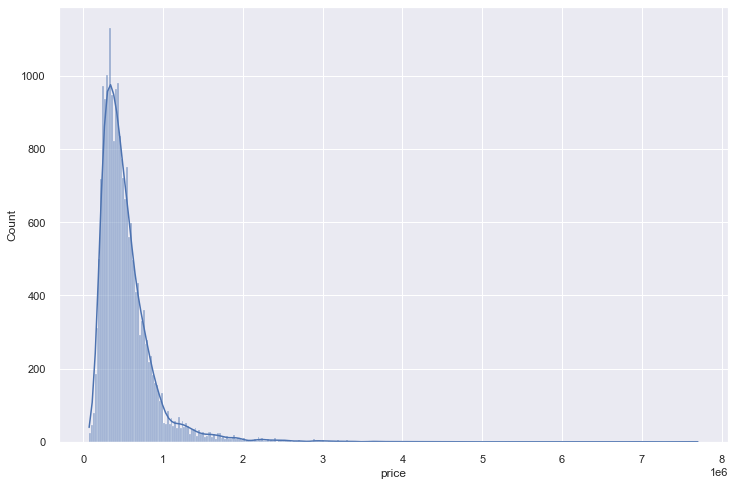

In [58]:
# house and price Distiribution
plt.figure(figsize = (12,8))
sns.histplot(H_Sales['price'], kde=True);
#plt.savefig('home_price_dist')

### MODEL TRAINING

In [18]:
#splitting up data for training and testing (remove lat and long)
H_Sales.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [53]:
X =H_Sales[[ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]

In [54]:
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0
1,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991
2,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0
3,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0
4,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.00000,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,0
21609,400000.00000,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,0
21610,402101.00000,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,0
21611,400000.00000,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,0


In [55]:
Y= H_Sales['price']

In [56]:
Y

0       221900.00000
1       538000.00000
2       180000.00000
3       604000.00000
4       510000.00000
            ...     
21608   360000.00000
21609   400000.00000
21610   402101.00000
21611   400000.00000
21612   325000.00000
Name: price, Length: 21613, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split

### MODEL EVALUATION

### CONCLUSION